In [1]:
import math as m
from matplotlib import pyplot as plt
import numpy as np
import csv 
from scipy.optimize import fsolve

In [72]:
# phi = volume fraction
# v = volume of molecule
# y = dipole moment

INV_BETA = (1 / 298 * 1.38 * 10 ** (-23)) ** -1 # by default rtp

def entropy_v1 (v, phi):
    return (phi / v * m.log (phi))   

def dipole_diff_v1 (v, phi, y, net_dip):
    return (0.5 * phi / v) * ((y / net_dip * m.log(1 + net_dip)) - m.log(1 + y))

# energy_mix_map (134.05, 30.0, 2.84, 29.8, "trichloromethane", "water")
# energy_mix_map (67.23, 30.0, 14.27, 29.8, "methanol", "water")


# determines whether 2 liquids are miscible
def is_miscible_v1 (va, vb, ya, yb): 
    acc_y = []
    acc_x = []
    for i in range (1, 100000): # for volume of mixing, vol fractions must > 0 
        phiA = 0.00001 * i
        phiB = 1 - phiA
        net_dip = (phiA * ya) + (phiB * yb)
        subA = dipole_diff_v1 (va, phiA, ya, net_dip) + entropy_v1 (va, phiA)
        subB = dipole_diff_v1 (vb, phiB, yb, net_dip) + entropy_v1 (vb, phiB)
        acc_x.append (phiA) 
        acc_y.append (subA + subB)
    first_deri = np.gradient (acc_y)
    second_deri = np.gradient (first_deri) # skipping first_deri, since it's not needed
    #print(first_deri)
    fig = plt.figure() #Plot
    #ax = fig.add_subplot(121) #Plot
    #ax.plot(acc_x,first_deri)
    
    ax = fig.add_subplot(111) #Plot
    ax.plot(acc_x,acc_y)
    
    for y in second_deri: 
        if y < 0:
            points = double_tangent(first_deri, acc_y, acc_x)
            return ([False, points])
    return ([True, [0,0]])

In [73]:
def double_tangent(der, acc_y, acc_x):
    mini = []
    for d in range (0, len(der)-1):
        if(der[d] <0 and der[d+1]>0):
            mini.append(d)

    if(acc_y[mini[0]] < acc_y[mini[1]]):
        step=1
    else: step= -1

    pointA = mini[0]
    pointB = mini[1]

    for n in range(1, 15000):
        for m in range (1, len(der)-mini[1]-1):
            if(np.abs(der[pointA]-der[pointB]) <= 0.0000000000001):
                b1=acc_y[pointA]-der[pointA]*acc_x[pointA]
                b2=acc_y[pointB]-der[pointB]*acc_x[pointB]
                if(b1-b2 <= 0.00000000001):
                    return ([acc_x[pointA], acc_x[pointB]])
            else: pointB = pointB + step

        pointA = pointA + step
        pointB = mini[1]

The liquids are immiscible. The divide occurs at  [0.24750000000000003, 0.9946300000000001]


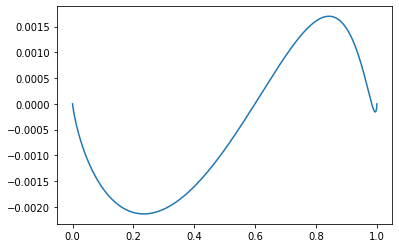

In [74]:
is_miscible = is_miscible_v1 (134.05, 30.0, 2.84, 29.8)
if(is_miscible[0] == False):
    print("The liquids are immiscible. The divide occurs at ", is_miscible[1])
else: print("The liquids are miscible.")
#print(is_miscible)

The liquids are miscible.


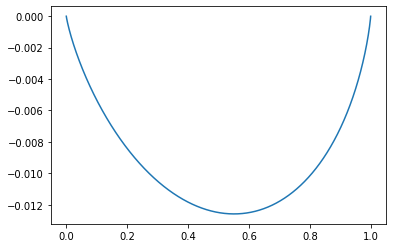

In [75]:
is_miscible = is_miscible_v1 (67.23, 30.0, 14.27, 29.8)
if(is_miscible[0] == False):
    print("The liquids are immiscible. The divide occurs at ", is_miscible[1])
else: print("The liquids are miscible.")
#print(is_miscible)